# Project: Rain prediction in Singapore

## Problem statement:


- To predict rain or not-rain tomorrow?

## Background:

A fishing company has business impact due to storm or heavy rain.
 -  if they venture into the sea during storm, the company would sustain heavy maintenance cost
 -  if they stay back, they would lose severely in terms of the size of their catch

As an AI engineer, we need to make predictions whether it would rain tomorrow or not!

In this notebook, we will go through the following.

1. Data cleaning and methods 
2. EDA


## Summary of the notebook:

### Data cleaning and imputing steps
-Summary of the data cleaning steps is summarized below.

|Column name|Data Preprocessing Steps|Imputing Steps|
|:---:|:---:|:---:|
|Date|1) Convert to Datetime format.</br>2) Create additional features - Month and Week of the year.</br>3) Drop the date column|NA|
|Location|NA|NA|
|Rainfall|NA|NA|
|Evaporation|NA|Fill with average evarporation|
|Sunshine|Make the sunshine column absolute to remove negatives.|Fill NAs with average Sunshine|
|WindGustDir|Set it to 'No Direction'|NA|
|WindGustSpeed|Set to 0|NA|
|WindDir9am|Set it to 'No Direction'|NA|
|WindDir3pm|Set it to 'No Direction'|NA|
|WindSpeed9am|Set to 0|NA|
|WindSpeed3pm|Set to 0|NA|
|Humidity9am|NA|Fill with average Humidity9am|
|Humidity3pm|NA|Fill with average Humidity3pm|
|Pressure9am|1) Normalize to make Upper. </br>2) Impute from the other Pressure measurement. Fill the rest with Medium.|NA|
|Pressure3pm|1) Normalize to make Upper. </br>2) Impute from the other Pressure measurement. Fill the rest with Medium.|NA|
|Cloud9am|NA|Fill with mode Cloud9am|
|Cloud3pm|NA|Fill with mode Cloud3pmRainToday|Fill Rain Today column with today's rainfall. Can drop as Rainfall information is already there.|NA|
|RainTomorrow|Map column to 0:No 1:Yes for some Algorithms to work|NA|
|ColourOfBoats|Drop column|NA|
|AverageTemp|NA|Fill NAs with average AverageTemp|


## Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pd.set_option('display.max_columns',30)
sns.set_style('white')

## Getting the data

In [40]:
import sqlite3

# Establish a connection to the database
conn = sqlite3.connect('./data/fishing.db')

# Read the data into a dataframe using the SQL query
df = pd.read_sql_query("SELECT * from fishing", conn)

# Close the connection
conn.close()

df

Date   Location  Rainfall  Evaporation  Sunshine WindGustDir  \
0      2009-03-08     Changi       0.0          7.0      11.2           E   
1      2014-11-12  Woodlands       0.0          8.4       9.6         WNW   
2      2008-08-08  Woodlands       0.0          7.6      11.1         ESE   
3      2015-10-12     Changi       0.0          7.2      11.4          NE   
4      2013-10-27  Woodlands       5.6          7.0       8.5         NNW   
...           ...        ...       ...          ...       ...         ...   
12992  2015-06-12       Tuas       0.4          1.6       5.6          SW   
12993  2016-09-29     Changi       0.0          7.4       0.6         NNW   
12994  2011-05-14    Sentosa       8.0          0.8       5.4           S   
12995  2011-02-14    Sentosa       4.4          4.4      12.0           S   
12996  2016-03-04     Changi       0.4          8.4      11.1           E   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0               35.0          E        ESE          15.0          19.0   
1               37.0        NNE         NW          13.0          28.0   
2               52.0         SE          E          19.0          19.0   
3               31.0        NNW         NE           9.0          13.0   
4               33.0          N          N          13.0          19.0   
...              ...        ...        ...           ...           ...   
12992           28.0       None         SW           0.0          13.0   
12993           35.0          N        NNW           4.0           9.0   
12994           52.0        WSW          S          24.0          28.0   
12995           31.0        SSE        SSE          13.0           9.0   
12996           33.0        ESE          E           4.0          11.0   

       Humidity9am  Humidity3pm Pressure9am Pressure3pm  Cloud9am  Cloud3pm  \
0             60.0         54.0         MED         Med       4.0       5.0   
1             60.0         56.0         MeD         LOw       1.0       2.0   
2              NaN         13.0         Med         MEd       0.0       0.0   
3             51.0         53.0        hIgh         med       1.0       1.0   
4             68.0         64.0         meD         MeD       6.0       5.0   
...            ...          ...         ...         ...       ...       ...   
12992         92.0         66.0         MEd         mED       4.0       3.0   
12993         57.0         48.0         LOw         LoW       7.0       8.0   
12994         87.0         64.0        HiGH        HIgH       NaN       NaN   
12995         68.0         52.0        hiGH        hIgh       5.0       1.0   
12996         66.0         44.0         mED         MeD       4.0       2.0   

      RainToday RainTomorrow ColourOfBoats  AverageTemp  
0            No           No          blue         33.4  
1          None          Yes          blue         35.4  
2          None           No          blue         32.8  
3            No           No           red         31.4  
4          None           No          grey         35.4  
...         ...          ...           ...          ...  
12992        No           No           red         29.3  
12993        No          Yes         white         31.3  
12994       Yes          Yes          grey         26.4  
12995       Yes           No          blue         30.5  
12996        No           No          blue         33.4  

[12997 rows x 21 columns]

In [601]:
df.head()

Date   Location  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2009-03-08     Changi       0.0          7.0      11.2           E   
1  2014-11-12  Woodlands       0.0          8.4       9.6         WNW   
2  2008-08-08  Woodlands       0.0          7.6      11.1         ESE   
3  2015-10-12     Changi       0.0          7.2      11.4          NE   
4  2013-10-27  Woodlands       5.6          7.0       8.5         NNW   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           35.0          E        ESE          15.0          19.0   
1           37.0        NNE         NW          13.0          28.0   
2           52.0         SE          E          19.0          19.0   
3           31.0        NNW         NE           9.0          13.0   
4           33.0          N          N          13.0          19.0   

   Humidity9am  Humidity3pm Pressure9am Pressure3pm  Cloud9am  Cloud3pm  \
0         60.0         54.0         MED         Med       4.0       5.0   
1         60.0         56.0         MeD         LOw       1.0       2.0   
2          NaN         13.0         Med         MEd       0.0       0.0   
3         51.0         53.0        hIgh         med       1.0       1.0   
4         68.0         64.0         meD         MeD       6.0       5.0   

  RainToday RainTomorrow ColourOfBoats  AverageTemp  
0        No           No          blue         33.4  
1      None          Yes          blue         35.4  
2      None           No          blue         32.8  
3        No           No           red         31.4  
4      None           No          grey         35.4

## Getting high level summary of the data 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12997 entries, 0 to 12996
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12997 non-null  object 
 1   Location       12997 non-null  object 
 2   Rainfall       12997 non-null  float64
 3   Evaporation    12917 non-null  float64
 4   Sunshine       12939 non-null  float64
 5   WindGustDir    12913 non-null  object 
 6   WindGustSpeed  12917 non-null  float64
 7   WindDir9am     12697 non-null  object 
 8   WindDir3pm     12945 non-null  object 
 9   WindSpeed9am   12992 non-null  float64
 10  WindSpeed3pm   12991 non-null  float64
 11  Humidity9am    12983 non-null  float64
 12  Humidity3pm    12970 non-null  float64
 13  Pressure9am    12995 non-null  object 
 14  Pressure3pm    12989 non-null  object 
 15  Cloud9am       12693 non-null  float64
 16  Cloud3pm       12615 non-null  float64
 17  RainToday      9799 non-null   object 
 18  RainTo

<b> Findings: </b>

- Date column is read as object. Should be converted as datetime.
- Rest of the columns need in-depth analysis to see if the data types and values are clean.

## Analyse NULL Values

In [603]:
df.isna().sum()

Date                0
Location            0
Rainfall            0
Evaporation        80
Sunshine           58
WindGustDir        84
WindGustSpeed      80
WindDir9am        300
WindDir3pm         52
WindSpeed9am        5
WindSpeed3pm        6
Humidity9am        14
Humidity3pm        27
Pressure9am         2
Pressure3pm         8
Cloud9am          304
Cloud3pm          382
RainToday        3198
RainTomorrow        0
ColourOfBoats       0
AverageTemp         9
dtype: int64

<b> Findings: </b>

- Few columns have NAs. Need to handle them in the data cleaning step below.

## Data cleaning

Let's analyse each column and clean them one by one.


### Date Column

1.  Convert Date column to DateTime format

In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df.Date.dtype

dtype('<M8[ns]')

2. Describe the date column

In [42]:
df['Date'].describe(datetime_is_numeric=True)

count                            12997
mean     2012-11-19 01:54:07.118565888
min                2008-07-01 00:00:00
25%                2010-07-13 00:00:00
50%                2012-09-30 00:00:00
75%                2015-02-22 00:00:00
max                2017-06-25 00:00:00
Name: Date, dtype: object

<b> Findings: </b>

- Date column is converted to Date time format.
- No NAs are present.
- Period range is from July 2008 to June 2017 (Approximately 10 year's worth of data). 
- Additional features to be created based on the date in the feature engineering section
    - Month of the year
    - Week of the year


### Location Column

No Nulls were present.

In [707]:
df['Location'].value_counts()

Woodlands    3515
Tuas         3497
Changi       3457
Sentosa      2528
Name: Location, dtype: int64

<b> Findings: </b>

- Not all locations are recorded uniformly on all days as indicated by varying counts.



### Rainfall Colum

No Nulls were oserved. Describe the Rainfall column

In [708]:
df['Rainfall'].describe()

count    12997.000000
mean         3.040532
std         10.958255
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max        367.600000
Name: Rainfall, dtype: float64

<Axes: >

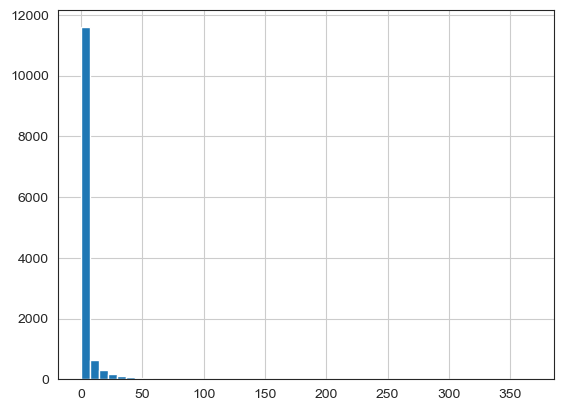

In [709]:
df['Rainfall'].hist(bins=50,)

<b> Findings: </b>




### Evaporation Column

In [710]:
df['Evaporation'].describe()

count    12917.000000
mean         5.551955
std          2.898708
min          0.000000
25%          3.400000
50%          5.400000
75%          7.400000
max         44.000000
Name: Evaporation, dtype: float64

In [610]:
df.corr(numeric_only = True)['Evaporation']

Rainfall        -0.059339
Evaporation      1.000000
Sunshine         0.178290
WindGustSpeed    0.213228
WindSpeed9am     0.182509
WindSpeed3pm     0.191477
Humidity9am     -0.513374
Humidity3pm     -0.299139
Cloud9am        -0.161064
Cloud3pm        -0.214402
AverageTemp      0.565107
Name: Evaporation, dtype: float64

<b> Findings: </b>

- Evaporation seems to be moderately correlated with AverageTemp and Humidity9am. This information can be used to impute, however this is tough when there are missing values in those too.
- Since the number of nulls is not high,we could impute by the average Sunshine for that location.

### Sunshine Column

Nulls (58) were present. Identify approach to handle Nulls.

In [711]:
df['Sunshine'].describe()

count    12939.000000
mean         6.496236
std          6.026236
min        -13.500000
25%          3.950000
50%          8.700000
75%         10.700000
max         13.900000
Name: Sunshine, dtype: float64

**Observation**:

There are some negative values. The 'number of hours' of sunshine cannot be zero.

<Axes: >

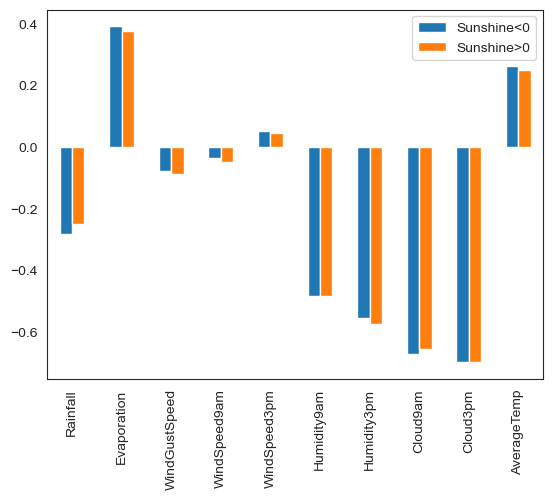

In [712]:
pd.DataFrame((-df[df['Sunshine'] < 0].corr(numeric_only=True)['Sunshine'].drop('Sunshine'), df[df['Sunshine'] > 0].corr(numeric_only=True)['Sunshine'].drop('Sunshine')), 
             index=['Sunshine<0', 'Sunshine>0']).T.plot(kind='bar')

In [10]:
#let's fix the negative Rainfall values for the EDA purposes here.

df['Rainfall']=abs(df['Rainfall'])

<b> Findings: </b>

- Negative values are incorrect data entry with the negative sign wrongly added. We will correct that by changing the negative sign to positive.
- Since the number of nulls is not high. We could impute by the average Evaporation for that location in that season/month.



### WindGustDir Column

Nulls (84) were present. Identify approach to handle Nulls.

In [713]:
df['WindGustDir'].value_counts().sort_index()

E      1333
ENE     906
ESE     881
EW       55
N      1210
NE      841
NNE     505
NNW     473
NS       69
NW      559
S       508
SE      713
SSE     680
SSW     832
SW     1107
W       784
WNW     752
WSW     705
Name: WindGustDir, dtype: int64

In [18]:
#let's look at 'WindGustSpeed' when 'WindGustDir'=NULL.
df[df['WindGustDir'].isna()].groupby(by = 'WindGustSpeed', dropna = False)['WindGustDir'].size().reset_index()

WindGustSpeed  WindGustDir
0           31.0            2
1           37.0            1
2           50.0            1
3           52.0            1
4            NaN           79

<b> Findings: </b>

- Most of the WindGustDir is NA when the WindGustSpeed is NA. It is possible that the WindGustSpeed is low for these values, so that the values are ommited in the datasheet.


### WindGustSpeed Column

Some Nulls (80) were present.

In [23]:
df['WindGustSpeed'].describe()

count    12917.000000
mean        36.640164
std         12.628845
min          9.000000
25%         28.000000
50%         35.000000
75%         43.000000
max        126.000000
Name: WindGustSpeed, dtype: float64

In [617]:
df[df['WindGustDir'].isna()].groupby(by = 'WindGustSpeed', dropna = False)['WindGustDir'].size().reset_index()

WindGustSpeed  WindGustDir
0           31.0            2
1           37.0            1
2           50.0            1
3           52.0            1
4            NaN           79

<b> Findings: </b>

- 79/80 NAs from WindGustDir are when WindGustDir is 'NA'.
- Min speed recorded is 9. It is possible that the values are low and hence ommited. 
    - We can impute with WindGustDir = "NoDirection" as a new direction to be precise.

### WindDir9am, WindSpeed9am Columns

Nulls in WindDir9am = 300, WindSpeed9am =5

In [715]:
df['WindSpeed9am'].describe()

count    12992.000000
mean        12.456974
std          8.341814
min          0.000000
25%          7.000000
50%         11.000000
75%         17.000000
max         65.000000
Name: WindSpeed9am, dtype: float64

<Axes: >

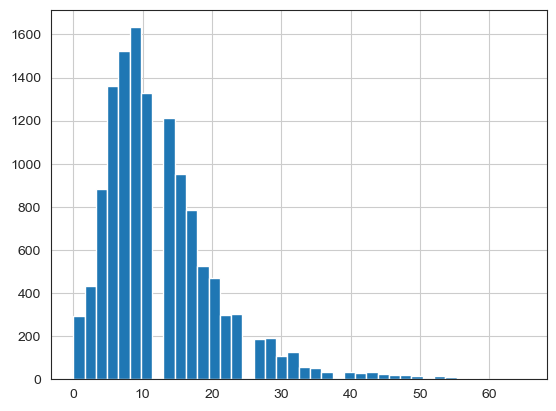

In [718]:
df['WindSpeed9am'].hist(bins=40)

In [621]:
df[df['WindDir9am'].isna()].groupby(by = ['WindSpeed9am'], dropna=False)['WindDir9am'].size().reset_index()

WindSpeed9am  WindDir9am
0           0.0         295
1           NaN           5

<b> Findings: </b>

- WindDir9am: Null values from WindDir9am are from when WindSpeed9am = 0 
    - "NoDirection" as a new direction
- WindSpeed9am: WindSpeed9am has 5 values.We can assign mean values

### WindDir3pm, WindSpeed3pm Columns

Nulls were present in WindDir3pm (52) and WindSpeed3pm (6)

In [719]:
df['WindSpeed3pm'].describe()

count    12991.000000
mean        16.703102
std          7.882508
min          0.000000
25%         11.000000
50%         15.000000
75%         20.000000
max         76.000000
Name: WindSpeed3pm, dtype: float64

<Axes: >

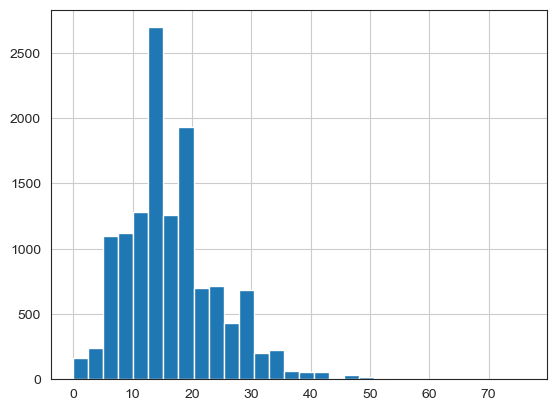

In [720]:
df['WindSpeed3pm'].hist(bins= 30)

In [625]:
df[df['WindDir3pm'].isna()].groupby(by = 'WindSpeed3pm', dropna = False)['WindDir3pm'].size().reset_index()

WindSpeed3pm  WindDir3pm
0           0.0          46
1           NaN           6

<b> Findings: </b>

- NA values from WindSpeed3pm : 6
- NA from WindDir3pm is associated with the zero values of the  WindSpeed3pm.
    - WindDir3pm can be assigned to "NoDirection"




### Humidity9am, Humidity3pm Columns

Small number of Nulls were present - Humidity9am(14), Humidity3pm(27).

In [722]:
df['Humidity9am'].describe()

count    12983.000000
mean        65.476623
std         15.460822
min         11.000000
25%         56.000000
50%         66.000000
75%         76.000000
max        100.000000
Name: Humidity9am, dtype: float64

[<Axes: >, <Axes: >]

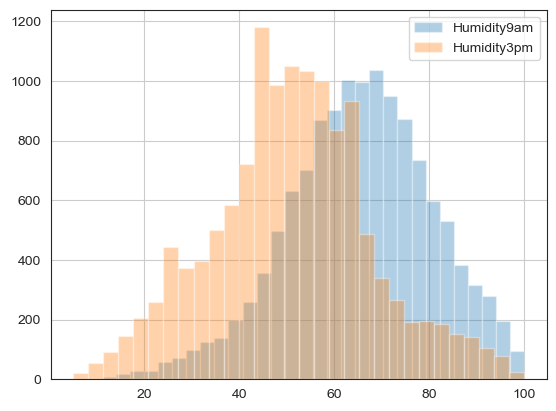

In [724]:
[df['Humidity9am'].hist(bins=30, alpha=0.35,legend =True), df['Humidity3pm'].hist(bins=30, alpha = 0.35,legend =True)]

<b> Findings: </b>

- Few Nulls are present. It can be imputed with average values from the training set.


### Pressure9am, Pressure3pm Columns

Few Nulls were present.

In [24]:
df['Pressure9am'].value_counts()

meD     1030
Med     1000
mEd      983
MEd      979
MeD      978
med      960
mED      947
MED      918
lOw      353
lOW      326
Low      321
LOw      308
low      305
LoW      304
LOW      299
loW      299
hIGh     191
HIgH     180
HiGH     179
hIgH     177
High     176
high     174
hIgh     174
hiGH     168
hiGh     166
HigH     164
HIgh     163
HIGH     162
higH     161
HiGh     158
hIGH     147
HIGh     145
Name: Pressure9am, dtype: int64

**Observations:**
- High and Low are typed in different combinations of upper and lower case. 
- We need to make them all upper cases

In [27]:
#Upper case the column values.
df['Pressure9am']=df['Pressure9am'].str.upper()
df['Pressure9am'].value_counts(dropna=False)

MED     7795
HIGH    2685
LOW     2515
None       2
Name: Pressure9am, dtype: int64

In [28]:
#lower case the column values.
df['Pressure3pm']=df['Pressure3pm'].str.upper()
df['Pressure3pm'].value_counts(dropna=False)

MED     7648
HIGH    2714
LOW     2627
None       8
Name: Pressure3pm, dtype: int64

[<Axes: >, <Axes: >]

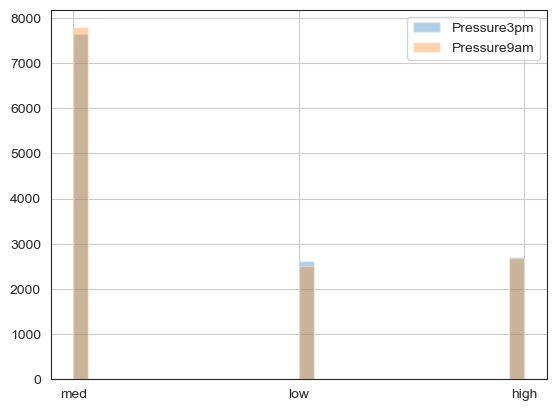

In [728]:
[df['Pressure3pm'].hist(bins=30, alpha=0.35,legend =True), df['Pressure9am'].hist(bins=30, alpha = 0.35,legend =True)]

In [633]:
print(f"Percentage of pressure recorded as same range for 9am and 3pm,\n {df[df['Pressure3pm']==df['Pressure9am']].shape[0]/df.shape[0]}")

Percentage of pressure recorded as same range for 9am and 3pm,
 0.8876663845502808


<b> Findings: </b>

- The values for the 'Pressure3pm' & 'Pressure9am' are same for 89% of the rows.
- To fill NA with medium value.

### Cloud9am, Cloud3pm Columns 

Nulls were present.

In [768]:
df['Cloud9am'].value_counts(), df['Cloud3pm'].value_counts()

(7.0    3301
 1.0    2548
 6.0    1288
 0.0    1123
 3.0    1036
 2.0    1016
 5.0     899
 8.0     802
 4.0     680
 Name: Cloud9am, dtype: int64,
 7.0    3148
 1.0    2457
 6.0    1263
 2.0    1246
 3.0    1149
 5.0     988
 0.0     857
 8.0     762
 4.0     745
 Name: Cloud3pm, dtype: int64)

<Axes: xlabel='Cloud3pm', ylabel='Sunshine'>

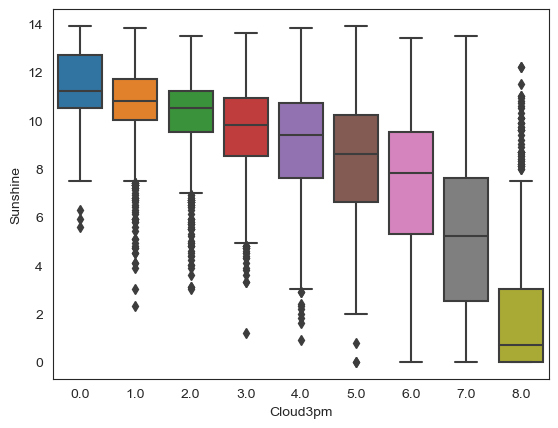

In [32]:
sns.boxplot(x=df['Cloud3pm'], y=abs(df['Sunshine']))

**Observation**
- Cloud3pm is inversely propotional to sunshine


<b> Findings: </b>

- Fill with mode values for Cloud9am and Cloud3pm

### RainToday Column

Significant number of Nulls were present (3198)

In [732]:
df['RainToday'].value_counts()

no     9948
yes    3049
Name: RainToday, dtype: int64

<Axes: >

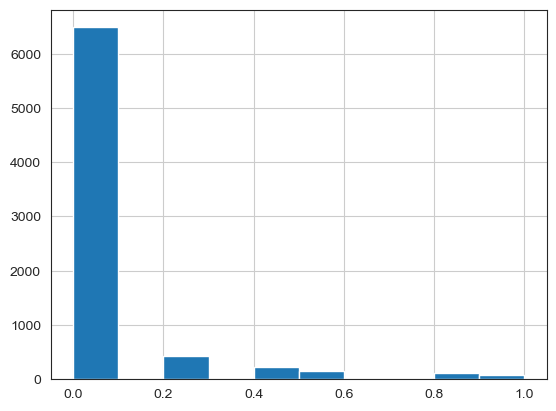

In [701]:
#RainToday shows higher NA rows
#since we hvae Rainfall information, we can fill up the 'RainToday' information.

df[df['RainToday']=='No']['Rainfall'].sort_values().hist()


<b> Observation: </b>

- RainToday is defined as yes for Rainfall > 1.0
- We can refill the values with yes/no based on this information (also provided in the problem statement)


In [702]:
# Define a lambda function to update the 'RainToday' column based on Rainfall

df['RainToday'] =  df['Rainfall'].apply(lambda row: 'Yes' if row > 1 else 'No')


### RainTomorrow Column

No Nulls were present. This is the target variable, y.

In [704]:
df.RainTomorrow.value_counts()

No     9998
Yes    2999
Name: RainTomorrow, dtype: int64

<Axes: >

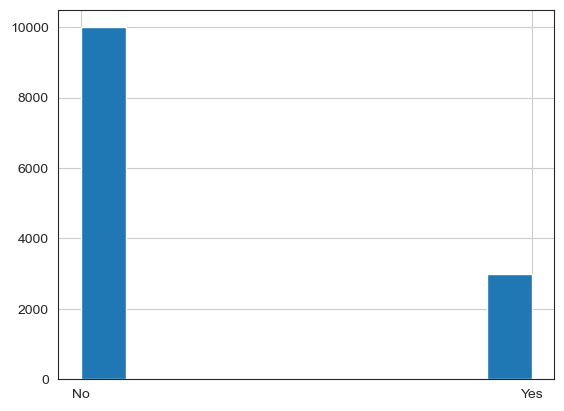

In [34]:
df.RainTomorrow.hist()

<b> Findings: </b>

- This is a unbalanced target variable. Umbalanced data may decrease the performance of the model.


### ColorofBoats Column

<b> Findings: </b>

- This column does not have any significance. Need to drop.


### AverageTemp Column

Some Nulls were present.

In [736]:
df['AverageTemp'].describe()

count    12988.000000
mean        31.522144
std          2.960591
min         24.300000
25%         29.100000
50%         31.700000
75%         34.200000
max         38.500000
Name: AverageTemp, dtype: float64

<b> Findings: </b>

- Not all locations are recorded uniformly on all days as indicated by varying counts.

## Correlation plot

- Correlation plot is based on the numerical columns

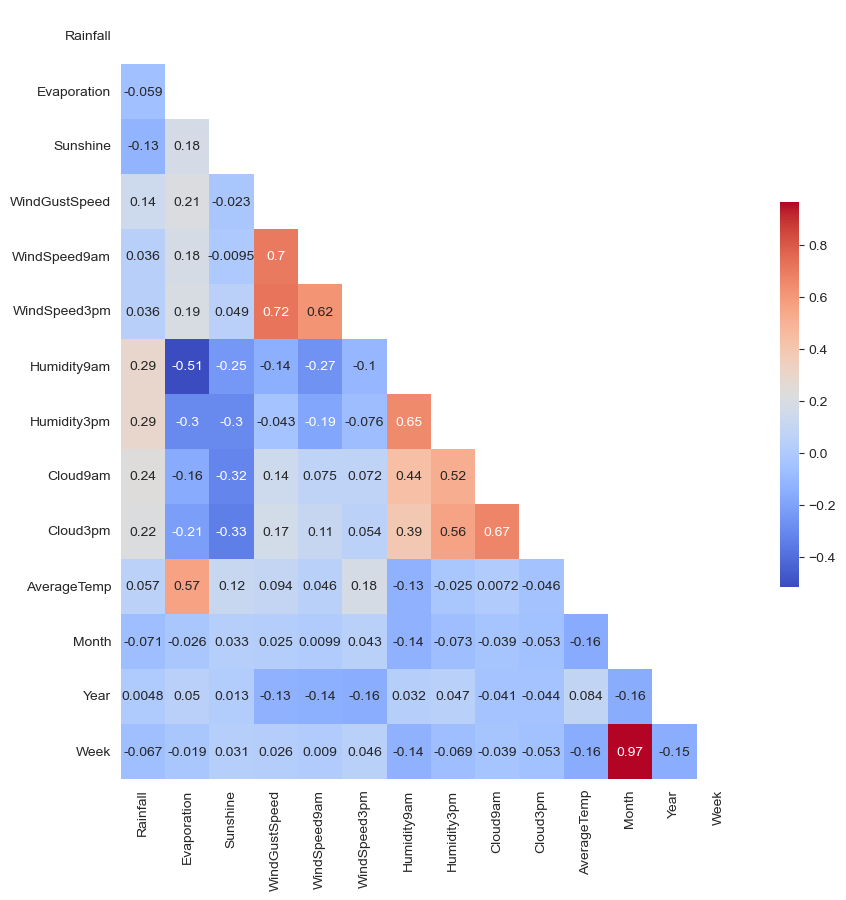

In [651]:
# Create a correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig = plt.figure(figsize = (10,10))
# Create a heatmap with masked upper triangle
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True,fmt='.2g', cbar_kws={"shrink": .5})

# Show the plot
plt.show()

<b> Findings: </b>

- Rainfall is related to our target variable.
- Humidity columns and clouds columns show stronger correlation compared to others columns.


In [35]:
## Pair plot

Pair plot is provided below.

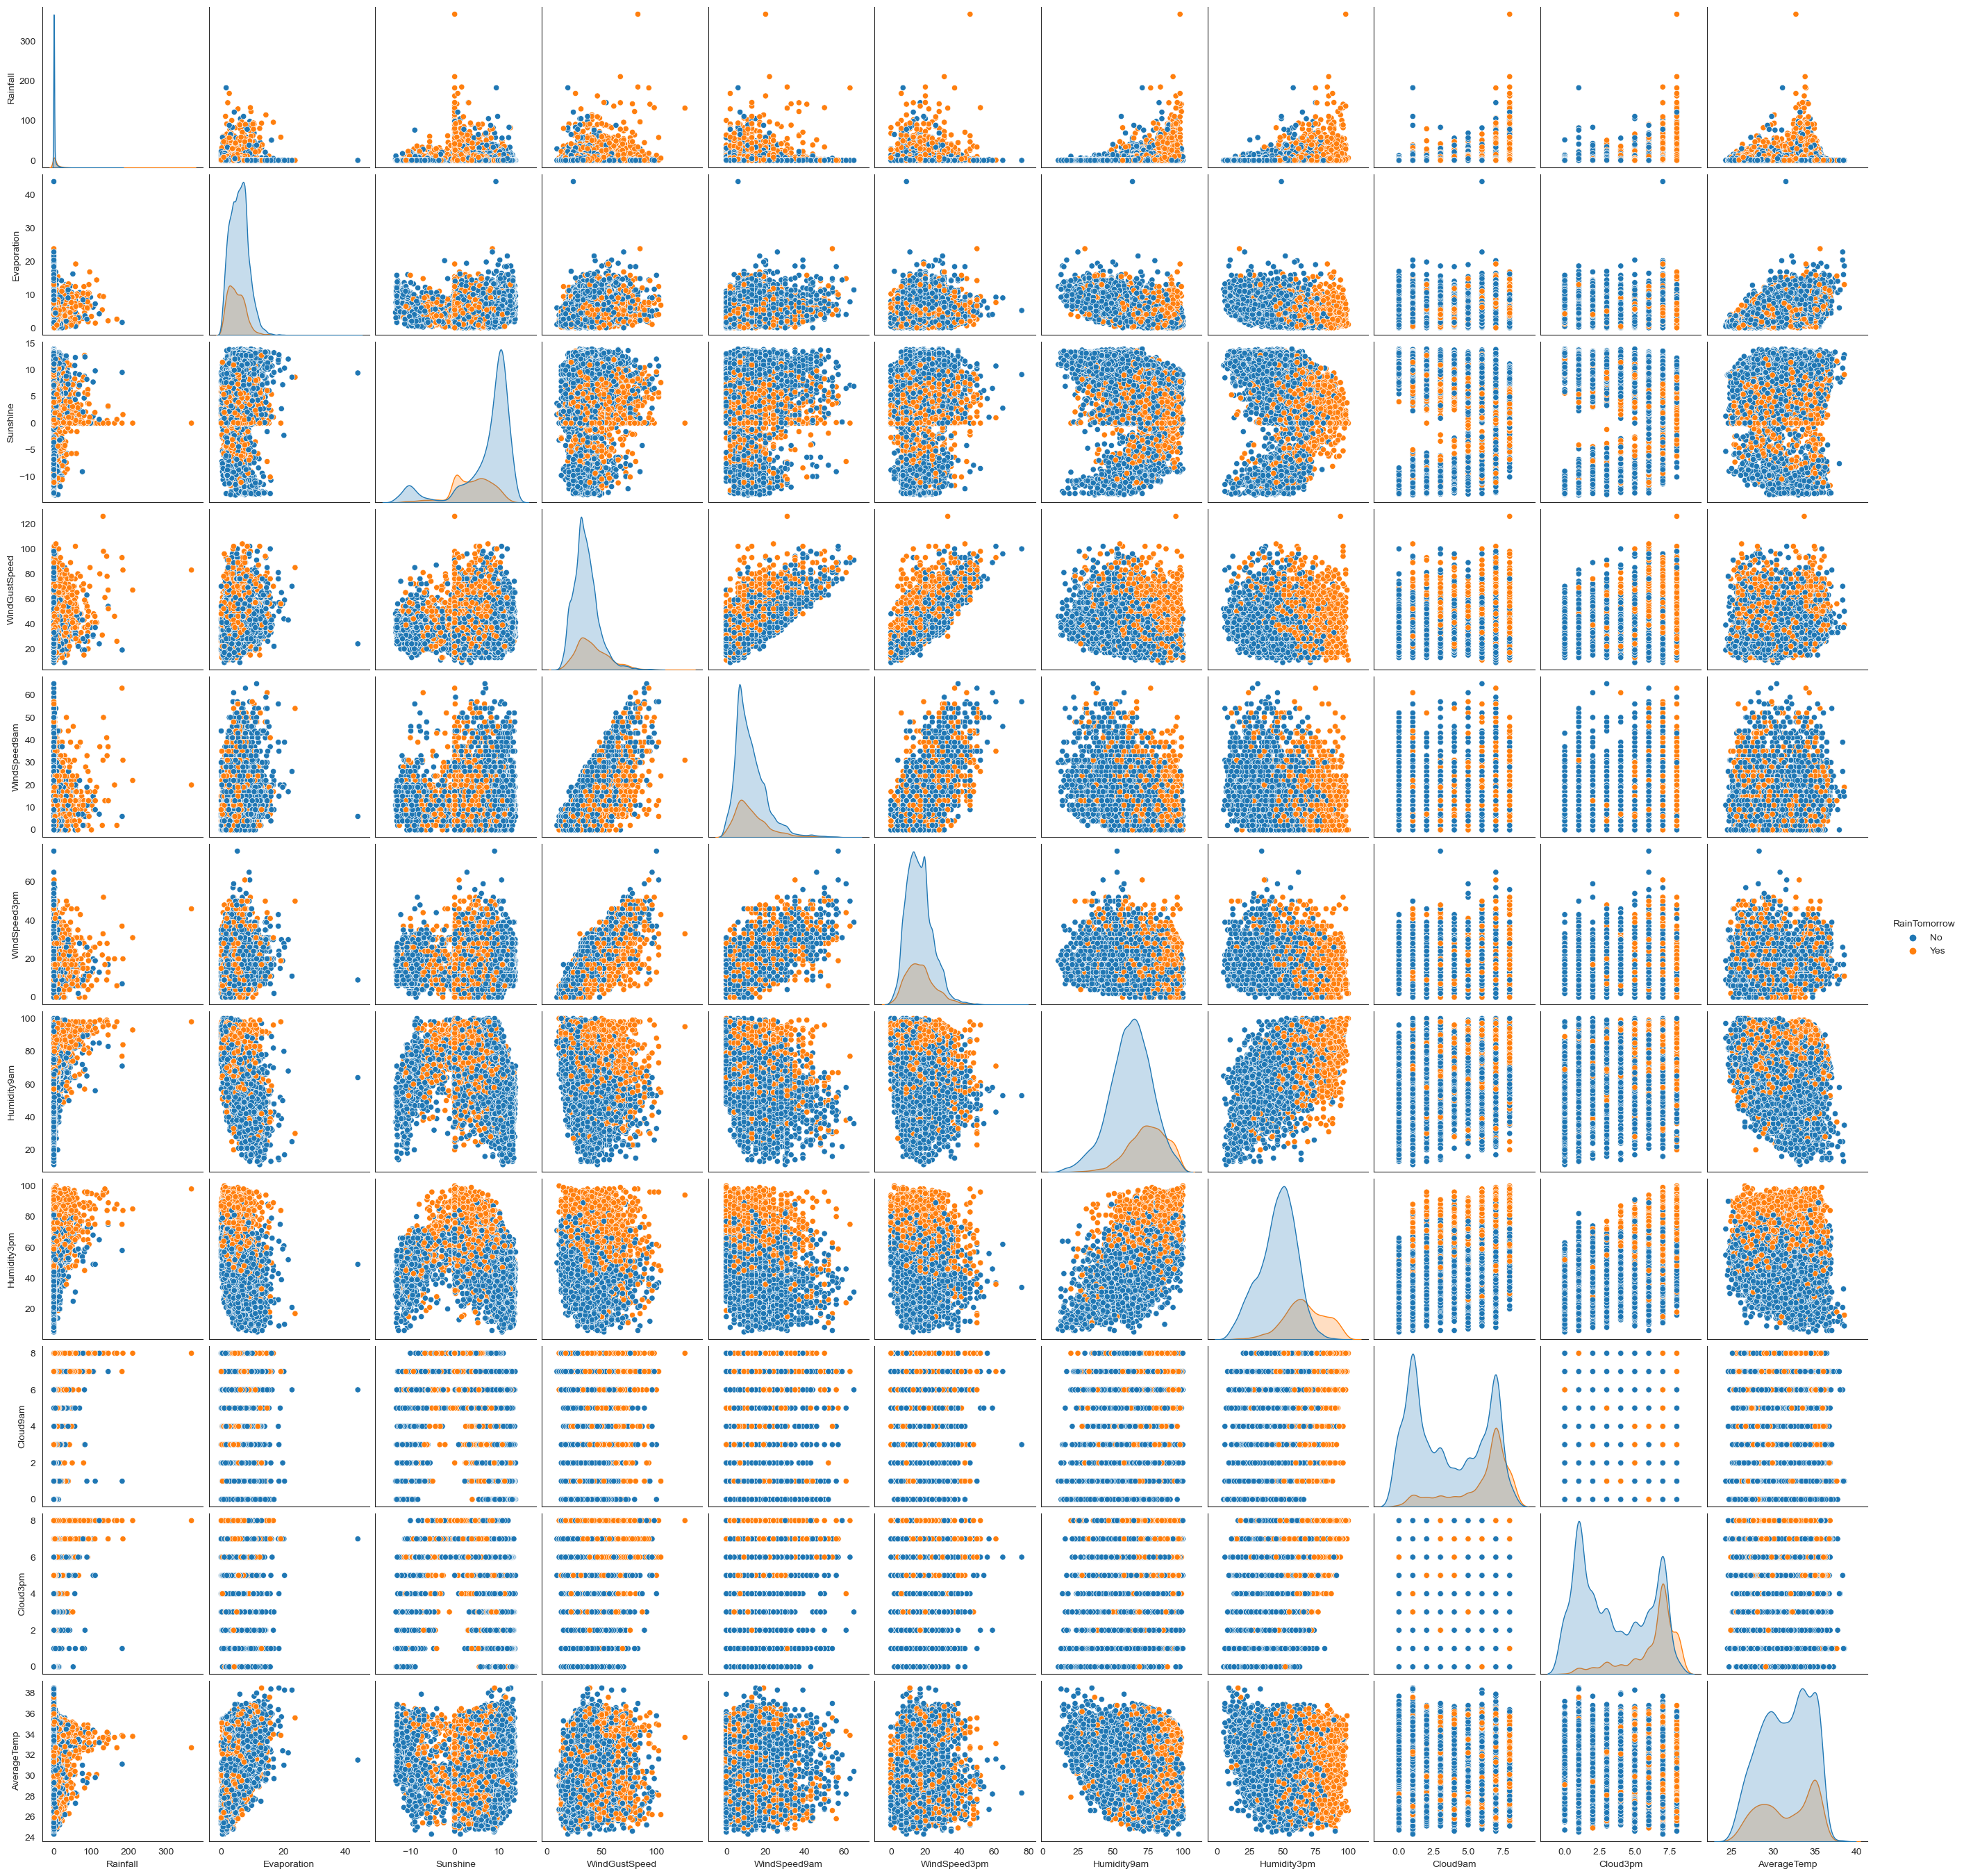

In [36]:
sns.pairplot(df.drop('Date',axis=1), hue='RainTomorrow')

##  Feature Engineering

 ### 1. Seasonality

- Rain is a influenced by seasons.
- Singapore has two seasons. [link]('http://www.weather.gov.sg/')

 a) the Northeast Monsoon occurs from December to early March
 
 b) the Southwest Monsoon from June to September
    

In [45]:
# convert the "Date" column to datetime format

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')

Text(0, 0.5, 'Rainfall (mm)')

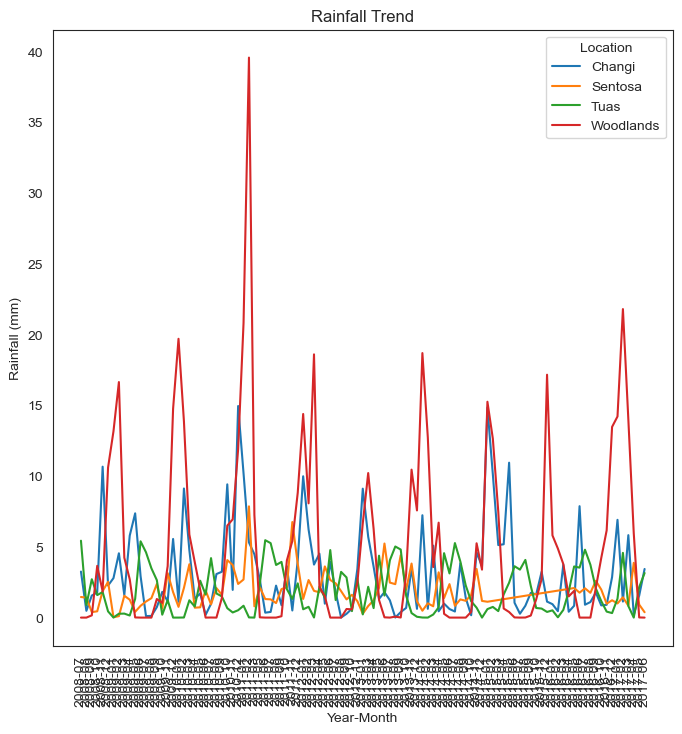

In [44]:
#preparing data to plot Rainfall trendline wrt Location.
rain_trend_df = df.groupby(['Year_Month', 'Location'])['Rainfall'].mean().reset_index()

# Create the plot
fig = plt.figure(figsize = (8,8))

sns.lineplot(data=rain_trend_df, x='Year_Month', y='Rainfall', hue= 'Location')
# Set the plot title and axes labels
plt.title('Rainfall Trend')
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Rainfall (mm)')


#### Observations:
 - We can observe monthly rainfall trend by location. Woodlands has higher rainfall followed by Changi.
 - It is clearly visible that seasonality and location plays a major role in the rainfall.
 - Therefore, we will feature engineer to include Year and Month to apture this seasonality

Text(0, 0.5, 'Rainfall (mm)')

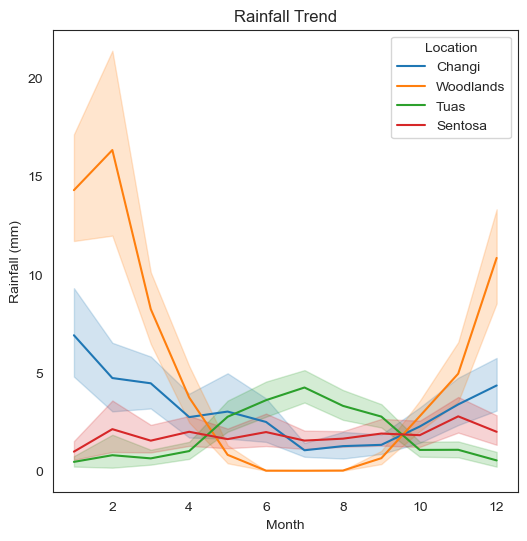

In [47]:
# Create the plot
fig = plt.figure(figsize = (6,6))

sns.lineplot(data=df, x='Month', y='Rainfall', hue= 'Location')
# Set the plot title and axes labels
plt.title('Rainfall Trend')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')

#### Observations:
 - We can observe monthly rainfall trend by location. Woodlands has higher rainfall followed by Changi.
 - Higher rainfall observed for Dec- March for Woodlands and Changi. It is not so pronounced for the other two locations.

## Summary of Missing values

In [765]:
def missing_values_summary(data):
    variable_name=[]
    n_total_value=[]
    n_missing_value=[]
    p_missing_value =[]
    data_type=[]
    comments=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        n_total_value.append(data[col].shape[0])
        n_missing_value.append(data[col].isnull().sum())
        p_missing_value.append(round(data[col].isnull().sum()*100/data[col].shape[0],3))
            
    missing_data=pd.DataFrame({"Variable":variable_name,
                               "Total_Value":n_total_value,
                               "Total_Missing_Value":n_missing_value,
                               "Missing_Value_Rate":p_missing_value,
                               "Data_Type":data_type,
                             })
    return missing_data.sort_values("Missing_Value_Rate", ascending=False)

In [766]:

missing_values_summary(df)

Variable  Total_Value  Total_Missing_Value  Missing_Value_Rate  \
16       Cloud3pm        12997                  382               2.939   
15       Cloud9am        12997                  304               2.339   
7      WindDir9am        12997                  300               2.308   
5     WindGustDir        12997                   84               0.646   
3     Evaporation        12997                   80               0.616   
6   WindGustSpeed        12997                   80               0.616   
4        Sunshine        12997                   58               0.446   
8      WindDir3pm        12997                   52               0.400   
12    Humidity3pm        12997                   27               0.208   
11    Humidity9am        12997                   14               0.108   
20    AverageTemp        12997                    9               0.069   
14    Pressure3pm        12997                    8               0.062   
10   WindSpeed3pm        12997                    6               0.046   
9    WindSpeed9am        12997                    5               0.038   
13    Pressure9am        12997                    2               0.015   
1        Location        12997                    0               0.000   
2        Rainfall        12997                    0               0.000   
17      RainToday        12997                    0               0.000   
18   RainTomorrow        12997                    0               0.000   
19  ColourOfBoats        12997                    0               0.000   
0            Date        12997                    0               0.000   

         Data_Type  
16         float64  
15         float64  
7           object  
5           object  
3          float64  
6          float64  
4          float64  
8           object  
12         float64  
11         float64  
20         float64  
14          object  
10         float64  
9          float64  
13          object  
1           object  
2          float64  
17          object  
18          object  
19          object  
0   datetime64[ns]

#### Observations:
 - Maximum missing values < 3%. This is an acceptable range, and would not hinder model predictions.
 - The target variable ('RainTomorrow') is a 'mildly' unbalanced distribution case.

## Conclusions

- Data cleaning:
     - We looked into each dataset from the data dictionary and figured out ways to clean the data and find columns to drop.
- EDA:
   -  We looked into the columns one by one for clarity and scan with the correlation plots. This is a very efficient way to visualize the correlated parameters and find columns to feature engineer or drop. However, our dataset is clean and do not show high correlation values with Rainfall.

- Feature engineering:
  - We have extracted year and month to capture the seasonality of the weather